## Flight Route Networks Visualization

### Introduction

In this jupyter notebook, we will use the airports and routes datasets from OpenFlights (https://openflights.org/data.html) and the USA airports dataset from Kaggle(https://www.kaggle.com/flashgordon/usa-airport-dataset).  We will use the datasets to make a visualization for domestic route networks and the betweeness centrality rankings of airports.  The population of the city each airport is located in is also incorporated in the visualization.  The visualization was inspired by Tuan Doan Nguyen's use of basemap and networkX for flight routes in his article at https://towardsdatascience.com/catching-that-flight-visualizing-social-network-with-networkx-and-basemap-ce4a0d2eaea6. 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

Read in the airporst dataset and clean it so it's only United States Airports.

In [2]:
airports_df = pd.read_csv('airports.dat',header=None)
airports_df = airports_df[[3,4,6,7]]
airports_df.columns = ['country','airport_IATA','lat','long']
airports_df = airports_df.loc[airports_df['country']=='United States',]
airports_df = airports_df.loc[airports_df['airport_IATA']!='\\N',]
airports_df = airports_df.reset_index(drop=True)

In [3]:
airports_df.head()

,country,airport_IATA,lat,long
0,United States,BTI,70.134003,-143.582001
1,United States,LUR,68.875099,-166.110001
2,United States,PIZ,69.732903,-163.005005
3,United States,ITO,19.721399,-155.048004
4,United States,ORL,28.545500,-81.332901


Read in the routes dataset and set the column names

In [4]:
routes_df = pd.read_csv('routes.csv')
routes_df.columns = ['airline', 'airline_id', 'source_airport', 'source_airport_id',
       'destination_airport', 'destination_airport_id', 'codeshare',
       'stops', 'equipment'] 

# Use this line below if you want the data set to have ONLY DOMESTIC FLIGHTS
routes_df = routes_df.loc[(routes_df['source_airport'].isin(airports_df['airport_IATA'])) & (routes_df['destination_airport'].isin(airports_df['airport_IATA'])),]

# Use the line below if you want the data set to have flights where at least one of
# the departure/arrival airport is domestic
#routes_df = routes_df.loc[(routes_df['source_airport'].isin(airports_df['airport_IATA'])) | (routes_df['destination_airport'].isin(airports_df['airport_IATA'])),]




In [5]:
routes_df = routes_df.groupby(['source_airport','destination_airport']).size().reset_index(name='total_flights')

In [7]:
# This cell is used just to sort airports to see which airports have
# a lot of total flights. It wasn't used in any final visualizations.


total_flights_out = (routes_df.groupby('source_airport').sum())
total_flights_in = (routes_df.groupby('destination_airport').sum())
concat_frames = pd.concat([total_flights_out, total_flights_in]).reset_index()
concat_frames.columns = ['airport','total_flights']
total_flights_df = concat_frames.groupby('airport').sum()
# filtered_flights = total_flights_df[total_flights_df['total_flights']>30].reset_index()
total_flights_df = total_flights_df.reset_index()
total_flights_df.columns = ['airport','total_flights']
# routes_df = routes_df.loc[(routes_df['source_airport'].isin(filtered_flights['airport'])) & (routes_df['destination_airport'].isin(filtered_flights['airport'])),]
# filtered_flights.shape
# filtered_flights.loc[concat_frames['airport']=='LAX']
total_flights_df.sort_values(by='total_flights',ascending=False).head()



,airport,total_flights
38,ATL,1496
389,ORD,752
133,DFW,657
132,DEN,653
296,LAX,606


At this point, all the data in the routes dataset is in the form of a directed graph,
with source airports, destination airports, and the total flights from source to destination.
The dataset was cleaned so that only airports with over 100 regular incoming+outgoing flights
are in the dataset.

In [13]:
ap_dist = pd.read_csv('airports_with_distance.csv')

In [14]:
ap_dist.rename(columns = {'Origin_airport':'source_airport','Destination_airport':'destination_airport'},inplace = True)
                           

In [15]:
#Here is source of problems, for some reason DEN is not in this dataset
ap_dist[ap_dist['destination_airport']=='DEN'].sort_values('Origin_population',ascending = 'False')

,source_airport,destination_airport,Distance,Origin_population,Destination_population


In [16]:
result = pd.merge(routes_df,ap_dist,on=['source_airport','destination_airport'])

In [19]:
result.head(100)


,source_airport,destination_airport,total_flights,Distance,Origin_population,Destination_population
0,ABE,ATL,3,692,688334,3087755
1,ABE,ATL,3,692,693750,3163883
2,ABE,ATL,3,692,698563,3245141
3,ABE,ATL,3,692,702512,3339551
4,ABE,ATL,3,692,705905,3444861
5,ABE,ATL,3,692,707682,3548667
6,ABE,ATL,3,692,710211,3652439
7,ABE,ATL,3,692,712594,3756986
8,ABE,ATL,3,692,714749,3872031
9,ABE,ATL,3,692,718662,3988728


In [21]:
airport_net_graph = nx.from_pandas_edgelist(result, source='source_airport', 
                            target='destination_airport', edge_attr=['total_flights','Distance','Origin_population','Destination_population'], create_using=nx.DiGraph())
nx.write_gexf(airport_net_graph, 'airplane_network_w_distance.gexf')


go into gephi, run betweeness centrality algorithms in gephi, export results and import them below

In [22]:
airports = pd.read_csv('all_airports_w_analysis.csv')
airports = airports[['Label','Degree','Weighted Degree','closnesscentrality','betweenesscentrality','pageranks']]

In [23]:
airport_pop = result[['source_airport','Origin_population']]
airport_pop = airport_pop.groupby('source_airport').max()
airport_pop.reset_index(level=0, inplace=True)
airport_pop.rename(columns = {'source_airport':'airport_IATA','Origin_population':'population'},inplace = True)
airports.rename(columns = {'Label':'airport_IATA'},inplace = True)
airports = pd.merge(airports,airports_df[['airport_IATA','lat','long']],on='airport_IATA')
airports = pd.merge(airports,airport_pop,on = 'airport_IATA')

In [24]:
#airports = airports[airports['pageranks']>.00134]
airports = airports[airports['long']>-130]

In [25]:
routes_df = routes_df.loc[routes_df['source_airport'].isin(airports['airport_IATA']) & routes_df['destination_airport'].isin(airports['airport_IATA'])]


In [26]:
graph = nx.from_pandas_edgelist(routes_df, source = 'source_airport', target = 
                                 'destination_airport', edge_attr = 'total_flights',
                                 create_using = nx.DiGraph())

In [27]:
# following two lines of code are from github.com/tuangauss
fig = plt.figure(figsize = (10,9))
basem = Basemap(projection='merc',llcrnrlon=-180,llcrnrlat=10,urcrnrlon=-50,
urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)

<Figure size 720x648 with 0 Axes>

In [28]:
x_coord, y_coord = basem(airports['long'].values, airports['lat'].values)
pos = {}
for count, elem in enumerate (airports['airport_IATA']):
     pos[elem] = (x_coord[count], y_coord[count])

In [29]:
graph.nodes()

NodeView(('ABE', 'ATL', 'CLT', 'DTW', 'MYR', 'ORD', 'PGD', 'PHL', 'SFB', 'ABI', 'DFW', 'ABQ', 'BWI', 'CNM', 'DAL', 'HOU', 'IAH', 'JFK', 'LAM', 'LAS', 'LAX', 'MCI', 'MDW', 'MSP', 'OAK', 'PDX', 'PHX', 'SAN', 'SEA', 'SFO', 'SLC', 'ABR', 'ABY', 'ACT', 'ACV', 'CEC', 'SMF', 'ACY', 'BOS', 'FLL', 'MCO', 'TPA', 'AEX', 'AGS', 'DCA', 'AHN', 'BNA', 'ALB', 'CLE', 'EWR', 'IAD', 'OGS', 'ALO', 'ALW', 'AMA', 'AOO', 'JST', 'APF', 'MIA', 'APN', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BHM', 'BMI', 'BQK', 'BTR', 'BTV', 'BUF', 'CAE', 'CAK', 'CHA', 'CHO', 'CHS', 'CID', 'CMH', 'COS', 'CRW', 'CSG', 'CVG', 'DAY', 'DHN', 'DSM', 'ELP', 'EVV', 'EWN', 'EYW', 'FAR', 'FAY', 'FNT', 'FSD', 'FSM', 'FWA', 'GNV', 'GPT', 'GRB', 'GRK', 'GRR', 'GSO', 'GSP', 'GTR', 'HSV', 'ICT', 'ILM', 'IND', 'JAN', 'JAX', 'LAN', 'LEX', 'LFT', 'LGA', 'LIT', 'MBS', 'MCN', 'MDT', 'MEI', 'MEM', 'MGM', 'MHT', 'MKE', 'MLU', 'MOB', 'MSN', 'MSY', 'OAJ', 'OKC', 'OMA', 'PBI', 'PIA', 'PIB', 'PIT', 'PNS', 'PVD', 'PWM', 'RDU', 'RIC', 'ROA', 'ROC', 'SA

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


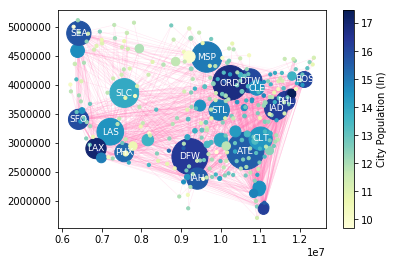

In [30]:
c = nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(),
                       node_size = [airports.loc[airports['airport_IATA']==x]['betweenesscentrality'].iat[0]/10+10  for x in graph.nodes()],
                       node_color = np.log(airports['population']),
                       cmap = 'YlGnBu')
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='xkcd:pink',
                       width = 0.5, alpha=0.1, arrows = False)
nx.draw_networkx_labels(G = graph, pos = pos, font_size=9, font_color = 'w',
  labels = {x:x for x in graph.nodes() if airports.loc[airports['airport_IATA']==x]['betweenesscentrality'].item() >= 2000})


colbar = plt.colorbar(c)
colbar.set_label('City Population (ln)')


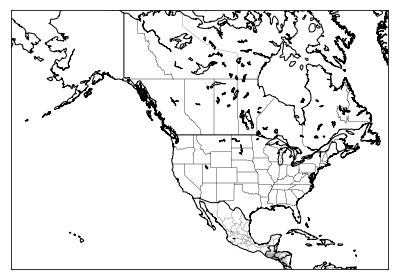

In [32]:
basem.drawcountries(linewidth = 1)
basem.drawstates(linewidth = 0.2)
basem.drawcoastlines(linewidth=1)
plt.tight_layout()
plt.show()


Note: the above visualization doesn't show in jupyter notebook, but does work when using python on a desktop. An image of the completed visualization is available on the github and in the corresponding article.

In [35]:
# see some top airports for betweeness centrality
airports.sort_values(by = 'betweenesscentrality',ascending=False).head(10)

,airport_IATA,Degree,Weighted Degree,closnesscentrality,betweenesscentrality,pageranks,lat,long,population
1,ATL,275,187507,0.633745,13835.841100,0.033225,33.636700,-84.428101,5475213
10,DFW,250,194000,0.614770,12846.846642,0.030857,32.896801,-97.038002,12895230
5,ORD,266,190801,0.628571,11819.495948,0.030414,41.978600,-87.904800,19161134
23,MSP,204,156246,0.592308,9119.132997,0.024119,44.882000,-93.221802,3269814
30,SLC,147,129795,0.546099,8214.348464,0.019909,40.788399,-111.977997,1130293
19,LAS,202,251238,0.588910,6996.066032,0.022241,36.080101,-115.152000,1902834
28,SEA,129,161477,0.538462,5797.084623,0.016285,47.449001,-122.308998,6815696
3,DTW,207,121974,0.588910,5655.045442,0.022369,42.212399,-83.353401,8996622
2,CLT,190,116320,0.580038,5294.398343,0.020399,35.214001,-80.943100,1745524
52,IAD,147,107938,0.546099,5110.221530,0.015875,38.944500,-77.455803,10952482
